# Non Linear Programming

<a target="_blank" href="https://colab.research.google.com/github/glaucogoncalves/nio/blob/main/lectures/02_04_NLP.ipynb"> <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Remember that an Optimization Problem is like

$\max or \min f(x)$

s.t.

$
g_i(x) \leq 0 \; i=1,\ldots,m\\
h_j(x) = 0 \; j=1,\ldots,p\\
$

Also, remenber that

* P = class of problems that have polynomial solutions
* NP-hard = class of problems that have polynomial verifiers and that are as complex as NP-complete problems

# Modeling

**Characteristics of an NLP**

* A problem is NLP <u>if at least the Objective Function **or** one of the constraints of the model is a non-linear function</u> of the decision variables
* NLP problems are very common in practice, but there is a variety of solutions

**Classification of NLPs**

* Unconstrained NLP (with a single variable or with multiple variables)
* Constrained NLP (includes concave, convex, and quadratic programming)

**Complexity and Optimization Problem Types**

* LP = Linear Programming belongs to P
* ILP = Integer Linear Programming, **in general**, belongs to NP-hard
* NLP = Non-linear Programming, **in general**, belongs to NP-hard

## Why NLP is different?

**LP Strategies fails**: Remember that in an LP the solution is always at a vertex of the polytope of feasible solutions. **This does not happen in NLP**. This is one of the characteristics that make NLPs more complicated.

### Example 1

$\max z = 4x_1 + 6x_2$

s.t.

$
10x_1^2 + 8x_2^2 \leq 128 \\
x_1 \leq 3 \\
x_1,x2 \geq 0
$

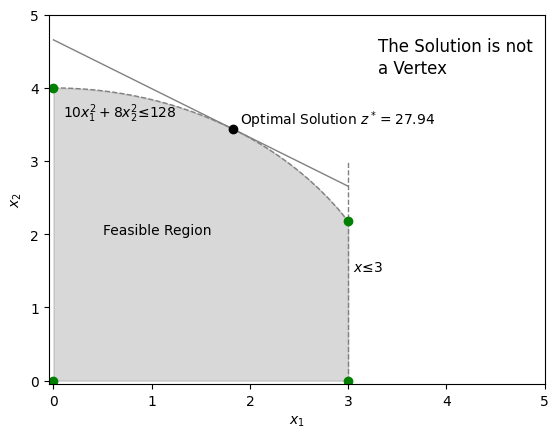

In [140]:
import matplotlib.pyplot as plt
import numpy as np

x1 = np.arange(0,3.1,0.1)
x2_iq1 = np.sqrt((128 - 10*x1**2)/8)

x1_iq2 = [3]*len(x1)
x2_iq2 = x1

x2_obj = (27.94 - 4*x1)/6

plt.plot(x1,x2_iq1,'--',color='gray',linewidth=1)
plt.plot(x1_iq2,x2_iq2,'--',color='gray',linewidth=1)
plt.plot(0,0,'.',color='green',markersize=12)
plt.plot(0,4,'.',color='green',markersize=12)
plt.plot(3,2.179449472,'.',color='green',markersize=12)
plt.plot(3,0,'.',color='green',markersize=12)

plt.plot(x1,x2_obj,'-',color='gray',linewidth=1)
plt.plot(1.83,3.44,'.',color='black',markersize=12)
plt.text(1.9,3.5,'Optimal Solution $z^* = 27.94$',fontsize=10,color='black')

plt.fill_between(x1,x2_iq1,color='grey',alpha=0.3)
plt.text(0.5,2,'Feasible Region',fontsize=10,color='black')
plt.text(0.1,3.6,'$10x_1^2 + 8x_2^2 ≤ 128$',fontsize=10,color='black')
plt.text(3.05,1.5,'$x ≤ 3$',fontsize=10,color='black')

plt.text(3.3,4.5,'The Solution is not',fontsize=12,color='black')
plt.text(3.3,4.2,'a Vertex',fontsize=12,color='black')

plt.xlim(-0.05,5)
plt.ylim(-0.05,5)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

### Example 2

$\max z = 240x_1 - 24x_1^2 +240x_2 -24x_2^2$

s.t.

$
2x_1 + 3x_2 \leq 18 \\
x_1 \leq 6 \\
x_1,x2 \geq 0
$

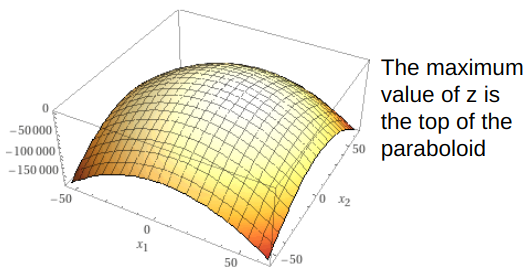

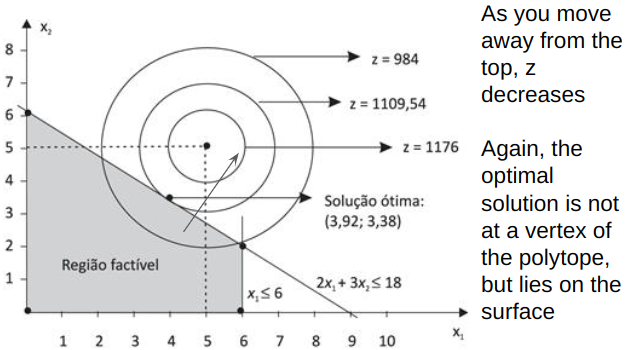

### Example 3

$\max z = 180x_1 - 30x_1^2 +180x_2 -45x_2^2$

s.t.

$
2x_1 + 3x_2 \leq 18 \\
x_1 \leq 6 \\
x_1,x2 \geq 0
$

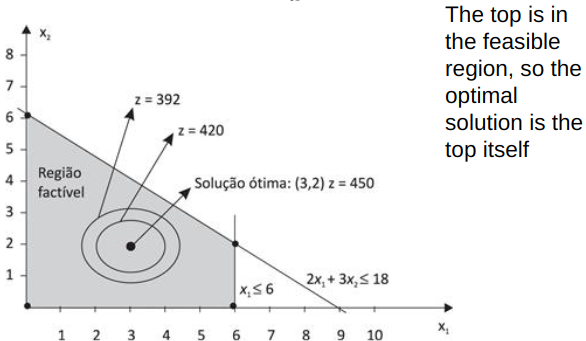

# Solving NLPs

How to solve non-linear optimization problems?

* We use differential calculus to find solutions
* There are algebraic (analytical) solution methods
* There are many Numerical Methods
  * Adaptations of methods to find roots of functions

## Unconstrained NLPs



* Naively, we assume that in an unrestricted NLP
  * the solution exists
  * is unique
  * and can be located by the solution method
* But…
  * The function may be unbounded ($ z = x^3 $; $ z= e^{-x} $)
  * It may not be unique ($ z=cos(x) $)
    * A minimum may not be a global minimum
    * A local minimum may be interesting even in unbounded functions
  * Numerical techniques usually find **local optima** and the simplest strategy (but without guarantees) is to start from different points and choose the best local solution found
* What will drive the best technique to use is to check the objective function:
  * Do I have the function?
  * Is it smooth?
  * Is it differentiable? At all points?
  * Is it Convex?

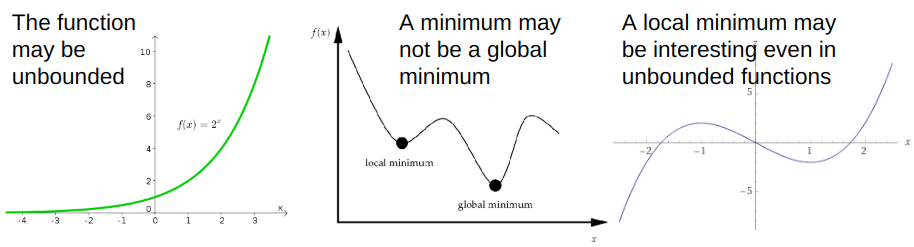

### Algebraic Solution

* Consider a multivariate function $ f(x_1,x_2,\ldots,x_n) $
* From the partial derivatives, it is possible to obtain the critical point
* A critical point can be a **maximum, minimum or inflection**
* The critical point is the point $ (x_1^*,x_2^*,\ldots,x_n^*) $ where

$
\frac{\partial}{\partial x_1} f(x_1^*,x_2^*,\ldots,x_n^*) = 0 \\
\frac{\partial}{\partial x_2} f(x_1^*,x_2^*,\ldots,x_n^*) = 0 \\
\ldots \\
\frac{\partial}{\partial x_n} f(x_1^*,x_2^*,\ldots,x_n^*) = 0 
$

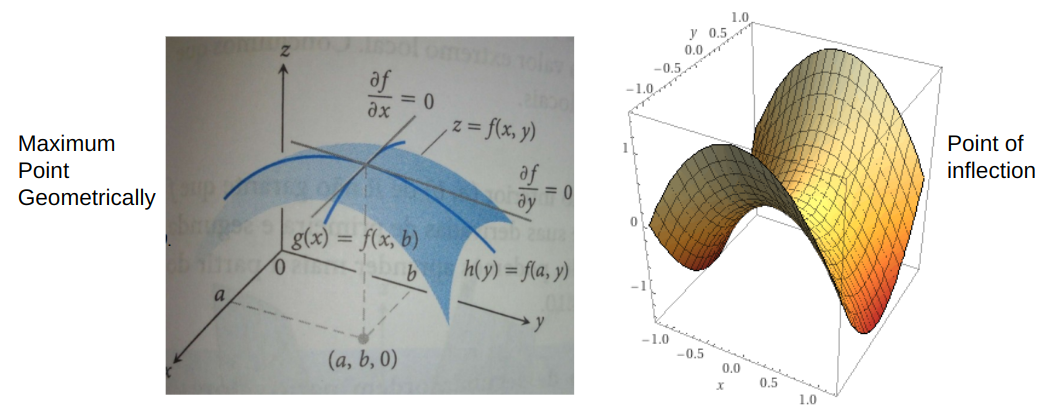

#### Exercise 1

A combination of two drugs is being tested to combat a certain bacterial infection. Studies have shown that the duration of infection can be modeled by the function $ f(x,y)=x^2+2y^2-4x-4y+xy+120 $, where $x$ is the dose of the first drug in hundreds of mg and $y$ is the dose of the second drug in hundreds of mg. Determine the dose of each drug that will minimize the duration of infection.

##### Solution

Let's take the partial derivatives:

$
\frac{\partial}{\partial x} (x^2+2y^2-4x-4y+xy+120) = 2x + y -4 \\
\frac{\partial}{\partial y} (x^2+2y^2-4x-4y+xy+120) = x + 4y -4
$

Now, solve the system below:

$
2x + y -4 = 0\\
x + 4y -4 = 0
$

The critical point is $(x,y) = (\frac{12}{7}, \frac{4}{7}) = (1.714,0.571)$ and the value of the objective function is $ f(x,y)=\frac{808}{7}=115.429 $.



Ok, but... **Is this point a maximum, minimum or inflection?**

##### Maximum / Minimum / Inflection?

* We can determine whether the function is convex or concave by analyzing the **principal minors of the Hessian matrix** of $f(.)$
  * If $f(.)$ is convex, then we have minimums
  * If $f(.)$ is concave, then we have maximums
  * But $f(.)$ can be neither convex nor concave

**Please note**: if $f(x)$ is convex, $-f(x)$ is concave

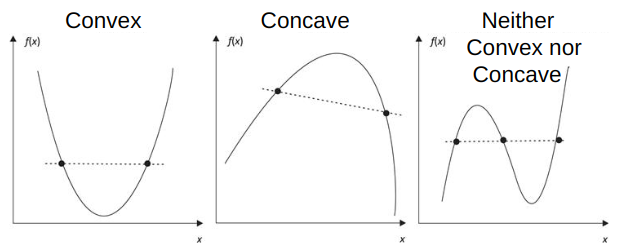

**Principal minors of the Hessian matrix**

The Hessian matrix of a function is a square matrix of its second-order partial derivatives. 

$
H = \begin{pmatrix}
    \frac{\partial^2 f}{\partial x_1^2} & \frac{\partial^2 f}{\partial x_1 \partial x_2} & \cdots & \frac{\partial^2 f}{\partial x_1 \partial x_n} \\
    \frac{\partial^2 f}{\partial x_2 \partial x_1} & \frac{\partial^2 f}{\partial x_2^2} & \cdots & \frac{\partial^2 f}{\partial x_2 \partial x_n} \\
    \vdots & \vdots & \ddots & \vdots \\
    \frac{\partial^2 f}{\partial x_n \partial x_1} & \frac{\partial^2 f}{\partial x_n \partial x_2} & \cdots & \frac{\partial^2 f}{\partial x_n^2}
\end{pmatrix}
$

The principal minors are the determinants of the square submatrices obtained by deleting the i-th row and the i-th column for all i from 1 to n (for the first principal minor), then deleting two rows i,j and the corresponding columns i,j for all $i<j$ (for the second principal minor), and so on, up to the determinant of the Hessian matrix itself (the n-th principal minor).

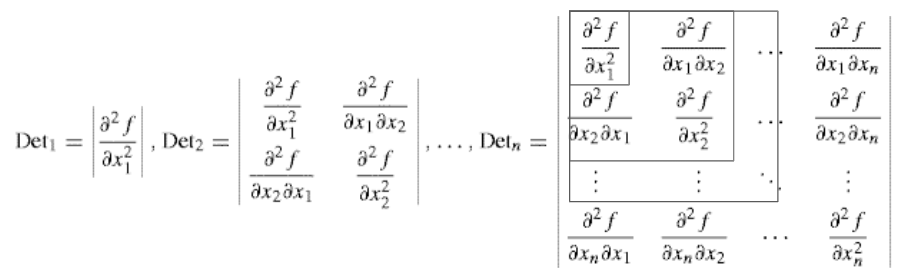

The table below is used to determine convexity. The Strictly Convex and Strictly Concave are special cases where the function $f(.)$ has only one optimum point.

|Class|Det1|Det2|Det3|Det4|$\ldots$|Detn|
|---|---|---|---|---|---|---|
|Convex|$\geq 0$|$\geq 0$|$\geq 0$|$\geq 0$|$\ldots$|$\geq 0$|
|Strictly Convex|$\gt 0$|$\gt 0$|$\gt 0$|$\gt 0$|$\ldots$|$\gt 0$|
|Concave|$\leq 0$|$\geq 0$|$\leq 0$|$\geq 0$|$\ldots$|$\ldots$|
|Strictly Concave|$\lt 0$|$\gt 0$|$\lt 0$|$\gt 0$|$\ldots$|$\ldots$|

* If $f(.)$ is a linear function
  * Consequently, Det1,Det2,…,Detn = 0, but the function is **both convex and concave**
* If neither condition is met, the function is neither convex nor concave. See examples below: (a) De 2D De Jong's function 1 (convex); (b) 2D Ackley's function (non-convex).

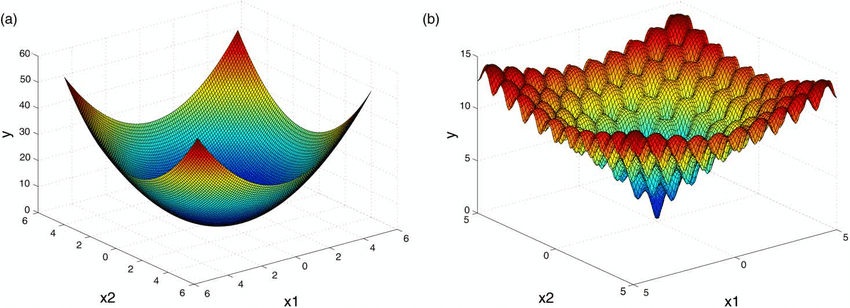

#### Back to Exercise 1

The function is $ f(x,y)=x^2+2y^2-4x-4y+xy+120 $. 

Using the "Principal minors of the Hessian matrix" apporach, we have that its Hessian is given by:

$
H = \begin{pmatrix}
    \frac{\partial^2 f}{\partial x^2} & \frac{\partial^2 f}{\partial x \partial y} \\
    \frac{\partial^2 f}{\partial y \partial x} & \frac{\partial^2 f}{\partial y^2} \\
\end{pmatrix} = \begin{pmatrix}
    2 & 1 \\
    1 & 4 \\
\end{pmatrix}
$

So the principal minors are:

$
Det_1 = \begin{vmatrix}
    2 
\end{vmatrix} = 2 \gt 0 \\
Det_2 = \begin{vmatrix}
    2 & 1 \\
    1 & 4 \\
\end{vmatrix} = 7 \gt 0 \Rightarrow
$ Thus, comparing against the analysis table, the function is **strictly convex**, therefore the critical point found is a minimum.

### Numerical Solutions to the Unconstrained NLP

* There is a large number of numerical solutions for NLP problems depending on the characteristics of the problem
  * Quadratic Programming, Convex Programming, Non-convex Programming, Differentiable or non-differentiable functions, etc.
* Important points to check in a solution method
  * Local Search vs Global Search
  * Convergence (the method can require certain conditions for convergence)
  * Efficiency (amount of computation required for solution)
* Methods broad classes
  * “Derivative-free” methods (ad hoc/black box/direct search)
    * Random search, Nelder-Mead Simplex (not LP Simplex)
    * Meta-Heuristics: Hill Climbing, Genetic algorithms, Tabu search, Simulated Annealing...
  * Iterative methods - Trust region
    * Use approximations of the objective function for a given region
  * <u>Iterative methods - Linear search</u>
    * Bisection, Secant
    * Gradient descent, Newton's method, Quasi-Newton
* Several of those methods are implemented in solvers


#### Back to Exercise 1

We can, alternatively, solve the problem below using a solver. 

$ \min f(x,y)=x^2+2y^2-4x-4y+xy+120 $

First, remeber that the minimum of the function is $(x,y) = (\frac{12}{7}, \frac{4}{7}) = (1.714,0.571)$.

Now install pyomo and the solver. We will use BARON that is a solver for several types of optimization problems. It has a free version.

In [3]:
#Installing pyomo and the solver BARON
#!pip install -q pyomo
#!wget -N -q "https://minlp-downloads.nyc3.cdn.digitaloceanspaces.com/xecs/baron/current/baron-lin64.zip"
#!unzip baron-lin64.zip

Creating and solving the model

In [76]:
from pyomo.environ import *

# create a model
model = ConcreteModel()

# declare decision variables
model.x = Var(domain=Reals)
model.y = Var(domain=Reals)

# declare objective
model.obj = Objective(expr = model.x**2 + 2*model.y**2 -4*model.x -4*model.y +model.x*model.y +120, sense=minimize)

model.pprint()

#please if there are any errors, double check the location of BARON executable
msolver = SolverFactory('baron', executable="../baron-lin64/baron")
msolver.solve(model).write()

# display solution
print('\nObjective = ', model.obj())

print('\nDecision Variables')
print('x = ', model.x())
print('y = ', model.y())

2 Var Declarations
    x : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :  None :  None :  None : False :  True :  Reals
    y : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :  None :  None :  None : False :  True :  Reals

1 Objective Declarations
    obj : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : minimize : x**2 + 2*y**2 - 4*x - 4*y + x*y + 120

3 Declarations: x y obj
# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: problem
  Lower bound: 115.42857142857142
  Upper bound: 115.42857142857142
  Number of objectives: 1
  Number of constr

#### Univariate Unconstrained NLP

Given a non-linear objective function $f(x)$ that we want to minimize, we set

$f'(x) = \frac{df(x)}{dx} = 0$

The problem becomes **finding the roots** of the equation, and there are various numerical methods for that.

**Bisection Method**: Given $a$ and $b$, two points, and a tolerance $\epsilon$ do:
1. $m=\frac{a+b}{2}$
2. If $f'(m) = 0$, Stop and return $m$
3. If $f'(m)f'(a) \lt 0$, then $b = m$
4. If $f'(m)f'(b) \lt 0$, then $a = m$
5. if $|a-b| \lt \epsilon$, then Stop and return $m=\frac{a+b}{2}$, else go to (1).

**Newton Method**: $x_{k+1}=x_{k}-\frac{f'(x_k)}{f''(x_k)}$

**Secant Method**: $x_{k+1}=x_{k}-\frac{x_k-x_{k-1}}{f'(x_k)-f'(x_{k-1})}f'(x_k)$

#### **Multivariate** Linear Seach

Starting from a point $x_0$, we will follow a succession of points $x_1, x_2, \ldots, x_n$, seeking to minimize the objective function $f(.)$, as follows

$x_{n+1} = x_n + \omega_n d_n$

where $d_n$ (vector) is the <u>descent direction</u> and $ω_n \gt 0$ is the step (it can also be called the learning rate).

We must choose $d_n$ so that it is a descent direction such that

$F(x_{n+1}) \lt F(x_{n})$

The strategies vary: in the way of choosing $x_$0, in the way of choosing $\omega_n$, and in the way of choosing $d_n$.

##### Choosing $d_n$

The gradient points to the region where the function increases, so we can choose $d_n$ opposite to the gradient, that is,

$<\nabla F(x_n), d_n> \; \lt 0 $

Please note that $<a,b> = ||a|| \times ||b|| \times \cos(\theta)$ is the dot product

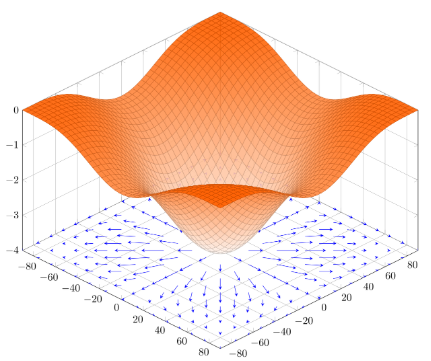

**Strategies** 

* Gradient Descent: $d_n = - \nabla F(x_n) \Rightarrow x_{n+1} = x_n - \omega_n \nabla F(x_n)$
* Newton Method: $d_n = [H(x_n)]^{-1} \nabla F(x_n) \Rightarrow x_{n+1} = x_n - \omega_n [H(x_n)]^{-1} \nabla F(x_n)$
* Quasi-Newton Method<u>**s**</u>: Approximates the Hessian matrix, since the cost of calculating and inverting it is high

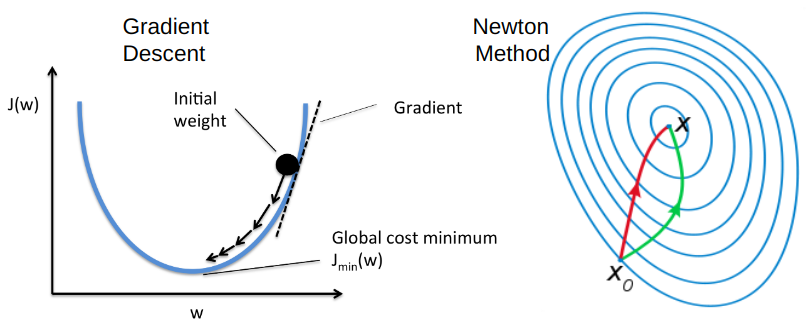

**Broyden–Fletcher–Goldfarb–Shanno (BFGS) Algorithm**

Given: $x_0$ and an approximation of the inverse Hessian matrix $B_0$
Repeat until convergence
1. Obtain the direction $d_n$ by solving $d_n = - B_n \nabla F(x_n)$
2. Choose $\omega_n$ using some technique
3. Set $s_n = \omega_n d_n$
4. Find the next value of x, $x_{n+1} = x_n + s_n$
5. Set $y_n = \nabla F(x_{n+1}) - \nabla F(x_n)$
6. Find $B_{n+1} = B_n + \frac{(s^T_ny_n + y^T_nB_ny_n)(s_ns^T_n)}{(s^T_ny_n)^2} - \frac{B_ny_ns^T_n + s_ny^T_nB_n}{s^T_ny_n}$

#### Back to Exercise 1

Find the minimum of the function $ f(x,y)=x^2+2y^2-4x-4y+xy+120 $ using the gradient method and Newton's method. Use $ \omega_n = \omega = 0.1 $.

**Gradient Method**

First, remeber that the minimum of the function is $(x,y) = (\frac{12}{7}, \frac{4}{7}) = (1.714,0.571)$.

Second, let's calculate the gradient of the function.

$ \nabla f(x,y) = \begin{bmatrix}
\frac{\partial}{\partial x} f(x,y) \\
\frac{\partial}{\partial y} f(x,y)
\end{bmatrix} = \begin{bmatrix}
2x + y -4 \\
x + 4y -4
\end{bmatrix} $

The code below implements the gradient function as a python function, and starting from the point $x_0 = (2,2)$ updates this solution using $ x_{n+1}= x_n - \omega \begin{bmatrix}
2x + y -4 \\
x + 4y -4
\end{bmatrix}$

In [3]:
import numpy as np

def grad(xn):
  x = xn.item(0)
  y = xn.item(1)
  dx = 2*x+y-4
  dy = x+4*y-4
  return np.matrix([[dx],[dy]])

xn = np.matrix([[2],[2]])

w = 0.1
maxIter = 100

for n in range(maxIter):
  xn = xn - w*grad(xn)

print(xn)

[[1.71428571]
 [0.57142857]]


Alternatively, we can use python libraries to find the gradient numerically.

In [8]:
# import torch library
import torch
import numpy as np

def grad(xn):
  x1 = xn[0]
  y1 = xn[1]
  x = torch.tensor(x1, requires_grad = True)
  y = torch.tensor(y1, requires_grad = True)
  f = x**2 + 2*y**2 - 4*x -4*y +x*y + 120
  f.backward()
  dx = x.grad
  dy = y.grad
  return np.matrix([[dx.item()],[dy.item()]])

xn = np.matrix([[2.0],[2.0]])

w = 0.1
maxIter = 100

for n in range(maxIter):
  xn = xn - w*grad(xn)

print(xn)

[[1.71428571]
 [0.57142857]]


**Newton Method**

Now, we will use, beyond the gradient, the Hessian matrix of the function.

$
H(x,y) = \begin{pmatrix}
    \frac{\partial^2 f}{\partial x^2} & \frac{\partial^2 f}{\partial x \partial y} \\
    \frac{\partial^2 f}{\partial y \partial x} & \frac{\partial^2 f}{\partial y^2} \\
\end{pmatrix} = \begin{pmatrix}
    2 & 1 \\
    1 & 4 \\
\end{pmatrix}
$

The solution is updated (starting with $x_0$) using $ x_{n+1} = x_n - \omega_n [H(x_n)]^{-1} \nabla F(x_n) $.

The code below extends the gradient descent code adding the Hessian to it. 
Please note that as the Hessian matrix is a constant, there is no need to update the Hessian and its inverse is computed just one time.
Also, please note that we use a lesser number of iterations than the gradient descent code.

In [21]:
import numpy as np

def grad(xn):
  x = xn.item(0)
  y = xn.item(1)
  a1 = 2*x+y-4
  a2 = x+4*y-4
  return np.matrix([[a1],[a2]])

H = np.matrix([[2,1],[1,4]])
H_1 = np.linalg.inv(H)

xn = np.matrix([[2],[2]])

w = 0.1
maxIter = 80

for n in range(maxIter):
  xn = xn - w*H_1*grad(xn)
  #print(grad(xn))

print(xn)

[[1.71434814]
 [0.57174068]]


##### Choosing $\omega_n$

**Tradeoff**: Large $\omega_n$ leads to divergence, but small $\omega_n$ decreases efficiency

The code below illustrates this important issue. It shows how the gradient descent method ($x_{n+1} = x_n - \omega_n \nabla F(x_n)$) behaves with different $\omega_n$ values. We choose an univariate simpler problem ($\min 2x^2 + 5x$) since the function is well-known and provides good visualization of this tradeoff.

[5, 0.0, -1.0, -1.2, -1.24, -1.248]
[75, 0.0, -3.0, -3.12, -3.1248, -3.124992]


<>:38: SyntaxWarning: invalid escape sequence '\o'
<>:45: SyntaxWarning: invalid escape sequence '\o'
<>:52: SyntaxWarning: invalid escape sequence '\o'
<>:38: SyntaxWarning: invalid escape sequence '\o'
<>:45: SyntaxWarning: invalid escape sequence '\o'
<>:52: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipykernel_3824/1038825385.py:38: SyntaxWarning: invalid escape sequence '\o'
  plt.text(-4,60,"$ \omega_0=0.05 $")
/tmp/ipykernel_3824/1038825385.py:45: SyntaxWarning: invalid escape sequence '\o'
  plt.text(-4,60,"$ \omega_0=0.2 $")
/tmp/ipykernel_3824/1038825385.py:52: SyntaxWarning: invalid escape sequence '\o'
  plt.text(-4,60,"$ \omega_0=0.51 $")


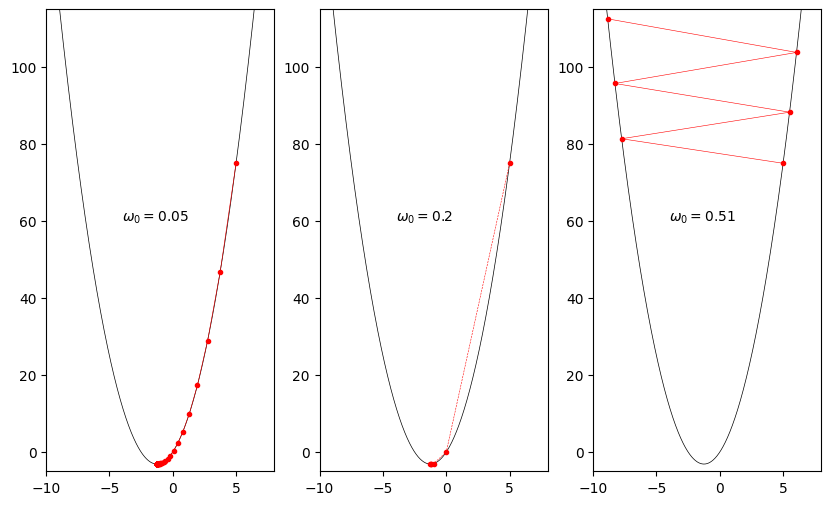

In [73]:
import numpy as np
import matplotlib.pyplot as plt

def gradient_descent_x2(w0, xn, maxIter):

    def grad(xn):
        dx = 4*xn + 5
        return dx
    
    x = [xn]
    y = [2*xn**2 + 5*xn]

    for n in range(maxIter):
        xn = xn - w0*grad(xn)
        x.append(xn)
        y.append(2*xn**2 + 5*xn)
    
    return x,y

x0 = 5

x = np.linspace(-9,7,1000)
y = 2*x**2 + 5*x

# running gradient descent for w0=0.05, and maxIter=100
x_1, y_1 = gradient_descent_x2(0.05,x0,100)

# running gradient descent for w0=0.2, and maxIter=14
x_2, y_2 = gradient_descent_x2(0.2,x0,5)

# running gradient descent for w0=0.51, and maxIter=14
x_3, y_3 = gradient_descent_x2(0.51,x0,5)

plt.figure(figsize=(10, 6))
plt.subplot(1,3,1)
plt.plot(x,y,color="black",linewidth=0.5)
plt.plot(x_1,y_1,'.-',color="red",linewidth=0.4)
plt.text(-4,60,"$ \omega_0=0.05 $")
plt.xlim(-10,8)
plt.ylim(-5,115)

plt.subplot(1,3,2)
plt.plot(x,y,color="black",linewidth=0.5)
plt.plot(x_2,y_2,'.--',color="red",linewidth=0.4)
plt.text(-4,60,"$ \omega_0=0.2 $")
plt.xlim(-10,8)
plt.ylim(-5,115)

plt.subplot(1,3,3)
plt.plot(x,y,color="black",linewidth=0.5)
plt.plot(x_3,y_3,'.-',color="red",linewidth=0.4)
plt.text(-4,60,"$ \omega_0=0.51 $")
plt.xlim(-10,8)
plt.ylim(-5,115)

print(x_2)
print(y_2)

plt.show()

We could see the problem of choosing $\omega_n$ in a different angle. Consider that the problem is $\min f(x)$, where $x$ is a vector. We are using a linear search strategy in the form $x_{n+1} = x_n + \omega_n d_n$. 

So, if we could choose the value of $w_n$ at each step, **we must choose it in order to minimize $f(x_{n+1})$**. In other words, let's take the function $g(\omega) = f(x_n + \omega d_n)$. The expected behavior of $g(\omega)$ is presented below. Basically, **it decreases as $w$ increases**, but only at a certain point $\omega^*$, when the function increases and the divergence presented above occurs.

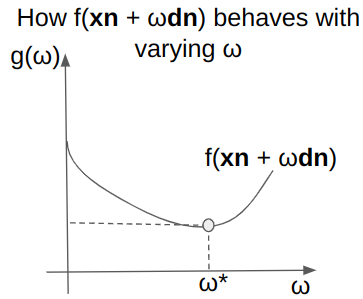

In a certain way, we have a new optimization problem! So, we could use the strategies that we learnt to find $\omega^*$.
Looking into this problem, we observe that it is non-linear and univariate. So we can find $\omega^*$
* using univariate strategies (exact form)
* using approximations to the solution (inexact form)

A very common approximation strategy uses the so called **Goldstein-Armijo Conditions**. 

The derivation of these conditions starts considering that near $\omega = 0$, the first-order Taylor approximation of $g(\omega) = f(x_n + \omega_n d_n)$ is:

$g(\omega) \approx f(x_n) + \omega \nabla f(x_n)^T d_n$

Figure below shows this the approximation.

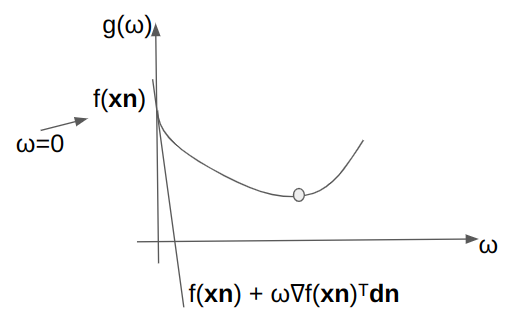

Please note that the product $\nabla f(x_n)^T d_n \lt 0$. So we can define two constants $0 \lt c_1 \lt c_2 \lt 1$ in a way that $\omega^*$ is enclosed in the red region as showed by figure below. In this region we have that

$
f(x_n + \omega d_n) \leq f(x_n) + c_1 \omega \nabla F(x_n)^T d_n \\
f(x_n + \omega d_n) \geq f(x_n) + c_2 \omega \nabla F(x_n)^T d_n \\
$

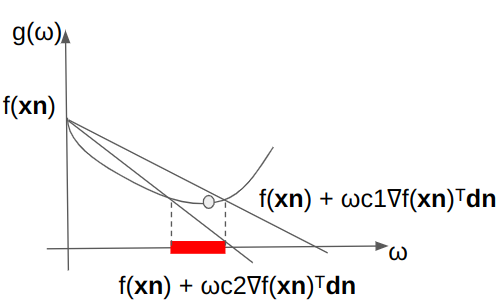

These conditions give us the algorithm below. The rational of the algorithm is to start with a large $\omega$ and:
* if it is beyond the red region, we decrease $\omega$
* if it is below the red region, we increase $\omega$

**Algorithm**

Given $x_n$, $d_n$ and the parameters $c_1$, $c_2$, $m_1$, $m_2$, and $\omega'$ (example: $c_1=0.2$; $c_2=0.8$; $m_1=0.5$; $m_2=1.5$; $\omega'=1$)

1. Do condition1 = $f(x_n+\omega' d_n) \gt f(x_n) + c_1 \omega' \nabla f(x_n)^T d_n$
2. Do condition2 = $f(x_n+\omega' d_n) \lt f(x_n) + c_2 \omega' \nabla f(x_n)^T d_n$
3. While condition1 or condition2
4. > if condition1 then $\omega' = m_1 \omega'$
5. > else $\omega' = m_2 \omega'$
6. > Do condition1 = $f(x_n+\omega' d_n) \gt f(x_n) + c_1 \omega' \nabla f(x_n)^T d_n$
7. > Do condition2 = $f(x_n+\omega' d_n) \lt f(x_n) + c_2 \omega' \nabla f(x_n)^T d_n$

## Constrained NLPs

General Model - at least $f(.)$ or some $g_i(.)$ is nonlinear

$
\max \text{or} \min f(x_1,x_2,\ldots,x_n) \\
s.t. \\
g_i(x_1,x_2,\ldots,x_n) \; \{\leq,=,\geq\} \; b_i, \, i=1,\ldots,m \\
x_1,x_2,\ldots,x_n \geq 0
$

### NLP with equality constraints

We will see the **algebraic solution** with **equality constraints**. So we consider that


$
\max \text{or} \min f(x_1,x_2,\ldots,x_n) \\
s.t. \\
g_1(x_1,x_2,\ldots,x_n) = b_1 \\
g_2(x_1,x_2,\ldots,x_n) = b_2 \\
\; \; \; \vdots \\
g_m(x_1,x_2,\ldots,x_n) = b_m \\
$

In this case we know that the constraints create a curve of feasible solutions on the surface of $f(.)$, as shown in the figure below.

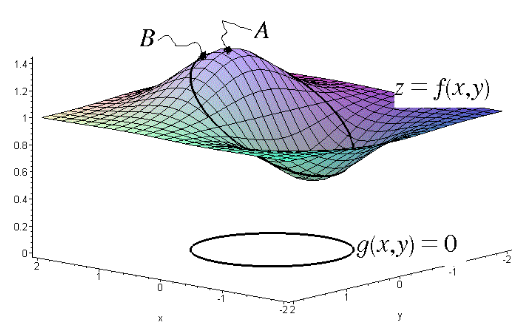

Below we have the level curves of $f(.)$ and the curve where $g(.)=k$, which determines the solution space of the problem. The figure also shows the direction of the gradient in $f(.)$ (red arrows). Note:

1. The gradient vector is perpendicular to the level curve
2. this is true for $\nabla f$
3. this is true for $\nabla g$, since $g(.)=k$ is a level curve in $g(.)$

At the optimum point (purple) we have:
* $\nabla f = \lambda \nabla g$ (the gradients have the same direction), for some $\lambda \in \mathbb{R}$ called the Lagrange multiplier
* Therefore we must find: $\nabla f - \lambda \nabla g = 0$

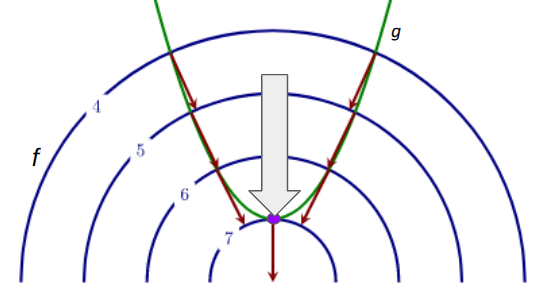

Now we can define a new objective function, that we call **lagrangian function**, in the form

$\mathcal{L}(x_1, x_2, \ldots, x_n, \lambda_1, \lambda_2, \ldots, \lambda_m) = f(x_1,x_2,\ldots,x_n) + \sum_{i=1}^m \lambda_i [b_i - g_i(x_1,x_2,\ldots,x_n)]$

Thus, we have a new unrestricted NLP, and we can find the values $x_1^*, x_2^*, \ldots, x_n^*$ and $\lambda^*_1, \lambda^*_2, \ldots, \lambda^*_m$ making $\nabla \mathcal{L} = 0$:

$
\frac{\partial \mathcal{L}}{\partial x_j} = 0, \; j=1,\ldots,n \\
\frac{\partial \mathcal{L}}{\partial \lambda_i} = 0, \; i=1,\ldots,m \\
$

#### Exercise 2

A tire company wants to invest in two new pieces of equipment: a flat press ($x$) and a rasp line (y). Each unit of flat press and each unit of rasp line purchased requires the purchase of 2 new adapters. The company has already decided to purchase 12 adapters. The profit from the new equipment can be represented by the function $f (x,y) = −x^2 − y^2 + xy + 6x + 2y$. Determine the model and the optimal solution.

So the problem is

$
\max z = -x^2 -y^2 +xy +6x + 2y \\
s.t. \\
2x+2y = 12 \\
x,y \geq 0
$

From the problem we can derive the lagrangian as below

$ \mathcal{L}(x,y,\lambda) = -x^2 -y^2 +xy +6x + 2y + \lambda(12 -2x -2y)$

So we have

$
\frac{\partial \mathcal{L}}{\partial x} = 0 \rightarrow -2x+y+6-2\lambda = 0 \\
\frac{\partial \mathcal{L}}{\partial y} = 0 \rightarrow -2y+x+2-2\lambda = 0 \\
\frac{\partial \mathcal{L}}{\partial \lambda} = 0 \rightarrow 12-2x-2y = 0
$

Finally

$
x^* = \frac{11}{3} \\
y^* = \frac{7}{3} \\
\lambda^* = \frac{1}{2} \\
z^* = \frac{49}{3}
$

### NLP with inequality constraints 

Suppose we have $m$ inequalities and $l$ equations, and a problem in the form:

$
\min f(x) \\
s.t. \\
g_i(x) \leq 0, \; i=1,\ldots,m \\
h_j(x) = 0, \; i=1,\ldots,l
$

For this problem, we have the following Lagrangian function (in vector form)

$
\mathcal{L}(x,\mu,\lambda) = f(x) + \mu^Tg(x) + \lambda^T h(x) \\
g(x) = (g_1(x),\ldots,g_m(x)) \\
h(x) = (h_1(x),\ldots,h_l(x))
$

The **Karush-Khun-Tucker (KKT) conditions** say that if <u>$x^*$ is a local optimum</u>, then there exist $µ^*$ and $λ^*$ (the KKT variables) such that the following conditions are true

**Stationarity**: $\frac{\partial \mathcal{L}(x^*,y^*,\lambda^*)}{\partial x_i} = 0$, for all $x_i$

**Primal Feasibility**: 

$
g_i(x^*) \leq 0, \; i=1,\ldots,m \\
h_j(x^*) = 0, \; i=1,\ldots,l 
$

**Dual Feasibility**:  $\mu_i \geq 0, \; i=1,\ldots,m$

**Complementarity**:  $\mu_ig_i(x^*) = 0 \; i=1,\ldots,m$

#### Exercise 3

Use KKT conditions to solve the problem below.

$\max z = -24x_1^2 -24x_2^2 +240x_1 + 240x_2\\
s.t.\\
2x_1+3x_2 \leq 18 \\
x_1 \leq 6 \\
x_1,x_2 \geq 0$

First adjust the problem:

* turning it in a minimization problem;
* zeroing all independent terms ($b_i$); 
* turning the domain into "lesser than" constraints 

$
\min 24x_1^2 +24x_2^2 -240x_1 - 240x_2 \\
s.t.\\
2x_1+3x_2 -18 \leq 0 \\
x_1 -6 \leq 0 \\
-x_1 \leq 0 \\
-x_2 \leq 0
$

Thus, the Lagrangian will be

$\mathcal{L}(x_1,x_2,\mu_1,\mu_2) = 24x_1^2+24x_2^2-240x_1-240x_2 + \mu_1(2x_1+3x_2-18) + \mu_2(x_1-6) + \mu_3(-x_1) + \mu_4(-x_2)$

Next, we find the KKT conditions

**Stationarity**

$48x^*_1-240+2\mu^*_1 + \mu^*_2 -\mu^*_3= 0\\
48x^*_2-240+3\mu^*_1-\mu^*_4 = 0$

**Primal Feasibility**: 

$2x_1+3x_2 -18 \leq 0 \\
x_1 -6 \leq 0 \\
-x_1 \leq 0 \Rightarrow x^*_1 \geq 0 \\
-x_2 \leq 0 \Rightarrow x^*_2 \geq 0$

**Dual Feasibility**:

$\mu^*_1,\mu^*_2,\mu^*_3,\mu^*_4 \geq 0$

**Complementarity**:

$\mu^*_1(2x_1+3x_2 -18) = 0\\
\mu^*_2(x_1 -6) = 0\\
\mu^*_3(-x^*_1) = 0\\
\mu^*_4(-x^*_2) = 0$

The complementarity equations gives us a system of non-linear equations. By analysis of this system, we have

$
\mu^*_3(-x^*_1) = 0 \Rightarrow \mu^*_3(x^*_1) = 0 \Rightarrow x^*_1(48x^*_1-240+2\mu^*_1 + \mu^*_2) = 0 \\
\mu^*_4(-x^*_2) = 0 \Rightarrow \mu^*_4(x^*_2) = 0 \Rightarrow x^*_2(48x^*_2-240+3\mu^*_1) = 0
$

---
**CASE 1**: Let's start with the case when all variables are no zero. 

$x^*_1 \neq 0$, $x^*_2 \neq 0$, $\mu^*_1 \neq 0$, $\mu^*_2 \neq 0$

$
48x^*_1-240+2\mu^*_1 + \mu^*_2 = 0 \\
48x^*_2-240+3\mu^*_1 = 0 \\
2x_1+3x_2 -18 = 0 \\
x_1 -6 = 0
$

$
x_1 = 6 \\
x_2 = 2 \\
\mu^*_1 = 48 \\
\mu^*_2 = -144
$

**FALSE!!!**

This result contradicts a dual feasability condition, so **some variable must be zero**.

---
**CASE 2**: $x^*_1 = 0$, $x^*_2 \neq 0$, $\mu^*_1 \neq 0$, $\mu^*_2 \neq 0$


$
48x^*_2-240+3\mu^*_1 = 0 \\
3x_2 -18 = 0
$

$
x_2 = 6 \\
\mu^*_1 = -16
$

**FALSE!!!**

This result contradicts a dual feasability condition.

---
**CASE 3**: $x^*_1 \neq 0$, $x^*_2 = 0$, $\mu^*_1 \neq 0$, $\mu^*_2 \neq 0$

$
48x^*_1-240+2\mu^*_1 + \mu^*_2 = 0 \\
2x_1 -18 = 0 \\
x_1 -6 = 0
$

In this case, $x_1$ has two values, as that cannot be, or $\mu_1$ or $\mu_2$ is zero.

**IF** $\mu^*_1 = 0$ **THEN** $x^*_1 = 6$ AND $\mu^*_2 = -48$ (it's **FALSE**, since contradicts a dual feasability condition)

**IF** $\mu^*_2 = 0$ **THEN** $x^*_1 = 9$ AND $\mu^*_1 = -96$ (it's **FALSE**, since contradicts a dual feasability condition)

---
**CASE 4**: $x^*_1 \neq 0$, $x^*_2 \neq 0$, $\mu^*_1 = 0$, $\mu^*_2 \neq 0$

$
48x^*_1-240 + \mu^*_2 = 0 \\
48x^*_2-240 = 0 \\
x_1 -6 = 0
$

$
x_1 = 6 \\
x_2 = 5 \\
\mu^*_2 = -48
$

**FALSE!!!**

This result contradicts a dual feasability condition.

---
**CASE 5**:  $x^*_1 \neq 0$, $x^*_2 \neq 0$, $\mu^*_1 \neq 0$, $\mu^*_2 = 0$

\\
$
48x^*_1-240+2\mu^*_1 = 0 \\
48x^*_2-240+3\mu^*_1 = 0 \\
2x_1+3x_2 -18 = 0
$

\\
$
x_1 = 3.92 \\
x_2 = 3.38 \\
\mu^*_1 = 25.85 \\
\mu^*_2 = 0
$

**TRUE!!!**

This solution is a local optimum.


#### When is the local optimum global?

Given a problem in the form 

$
\min f(x) \\
s.t. \\
g_i(x) \leq 0
$

If $f(x)$ and all $g_i(x)$ are <u>convex functions</u>, then any point $x^*$ that satisfies the KKT conditions (i.e., it is a local optimum) is <u>also a global optimum</u>.

#### Back to Exercise 3

The original problem is 

$\max z = -24x_1^2 -24x_2^2 +240x_1 + 240x_2\\
s.t.\\
2x_1+3x_2 \leq 18 \\
x_1 \leq 6 \\
x_1,x_2 \geq 0$

And after some transformation we have 

$
\min 24x_1^2 +24x_2^2 -240x_1 - 240x_2 \\
s.t.\\
2x_1+3x_2 -18 \leq 0 \\
x_1 -6 \leq 0 \\
-x_1 \leq 0 \\
-x_2 \leq 0
$

The KKT solution is

$
x_1 = 3.92 \\
x_2 = 3.38 \\
\mu^*_1 = 25.85 \\
\mu^*_2 = 0
$

Analyzing the problem we observe that. The constraints are linear, so they are <u>convex and concave at the same time</u>. 

So, we must check if the objective function is convex, using the principal minors of the Hessian matrix.

The Hessian of the objective function is

$
H(x,y) = \begin{pmatrix}
    \frac{\partial^2 f}{\partial x^2} & \frac{\partial^2 f}{\partial x \partial y} \\
    \frac{\partial^2 f}{\partial y \partial x} & \frac{\partial^2 f}{\partial y^2} \\
\end{pmatrix} = \begin{pmatrix}
    48 & 0 \\
    0 & 48 \\
\end{pmatrix}
$

So the principal minors are:

$
Det_1 = \begin{vmatrix}
    48 
\end{vmatrix} = 48 \gt 0 \\
Det_2 = \begin{vmatrix}
    48 & 0 \\
    0 & 48 \\
\end{vmatrix} = 2304 \gt 0 \Rightarrow
$ Thus, comparing against the analysis table, the function is **convex**, therefore the critical point found is a global solution.

### Numerical methods for constrained NLP

* Generalized Reduced Gradient Method (GRG2)
  * Uses the concept of basic and non-basic variables from Simplex to rewrite the constraints in terms of the non-basic variables and generate a reduced problem
  * The gradient method is applied to this reduced problem
  * Implemented in the Excel Solver
  * This paper describes the method: http://www.numdam.org/item/RO_1974__8_3_73_0.pdf
* Interior Point Methods
  * Used for both NLP and LP
  * Searches for the solution in the “interior” of the feasible region (see image below)
  * Uses the gradient to find the direction of descent and a projection matrix to guarantee the constraints
  * Base of the Solver ipopt

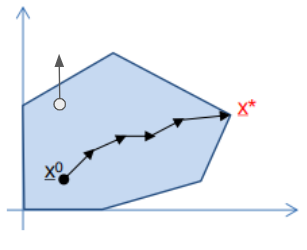

#### Back to Exercise 2

Let's use BARON to solve the a constrained problem.

$
\max z = -x^2 -y^2 +xy +6x + 2y \\
s.t. \\
2x+2y = 12 \\
x,y \geq 0
$

The solution found analytically is 

$
x^* = \frac{11}{3} \\
y^* = \frac{7}{3} \\
\lambda^* = \frac{1}{2} \\
z^* = \frac{49}{3}
$

In [77]:
from pyomo.environ import *

# create a model
model = ConcreteModel()

# declare decision variables
model.x = Var(domain=Reals)
model.y = Var(domain=Reals)

# declare objective
model.obj = Objective(expr = -model.x**2 - model.y**2 +model.x*model.y +6*model.x +2*model.y, sense=maximize)

model.restr1 = Constraint(expr = 2*model.x + 2*model.y == 12)

model.pprint()

msolver = SolverFactory('baron', executable="../baron-lin64/baron")
msolver.solve(model, tee=True)

# display solution
print('\nUtilidade = ', model.obj())

print('\nDecision Variables')
print('x = ', model.x())
print('y = ', model.y())

2 Var Declarations
    x : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :  None :  None :  None : False :  True :  Reals
    y : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :  None :  None :  None : False :  True :  Reals

1 Objective Declarations
    obj : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : maximize : - x**2 - y**2 + x*y + 6*x + 2*y

1 Constraint Declarations
    restr1 : Size=1, Index=None, Active=True
        Key  : Lower : Body      : Upper : Active
        None :  12.0 : 2*x + 2*y :  12.0 :   True

4 Declarations: x y obj restr1
 BARON version 25.3.19. Built: LNX-64 2025-03-19 22:07:55         
 Running on machine glauco-vivobook

 BARON is a product of The Optimization Firm.
 For information on BARON, see https://minlp.com/about-baron
 No BARON license file found in user PATH. Continuing in demo mode.
 Model size is 

#### Back to Exercise 3

The problem is 

$\max z = -24x_1^2 -24x_2^2 +240x_1 + 240x_2\\
s.t.\\
2x_1+3x_2 \leq 18 \\
x_1 \leq 6 \\
x_1,x_2 \geq 0$

The solution is

$
x_1 = 3.92 \\
x_2 = 3.38 \\
$

In [ ]:
from pyomo.environ import *

# create a model
model = ConcreteModel()

# declare decision variables
model.x1 = Var()
model.x2 = Var()

# declare objective
model.obj = Objective(expr = -24*model.x1**2-24*model.x2**2+240*model.x1+240*model.x2, sense=maximize)

model.c1 = Constraint(expr = 2*model.x1 + 3*model.x2 <= 18)
model.c2 = Constraint(expr = model.x1 <= 6)
model.c3 = Constraint(expr = model.x1 >= 0)
model.c4 = Constraint(expr = model.x2 >= 0)

model.pprint()

#msolver = SolverFactory('cplex_direct')
msolver = SolverFactory('baron', executable="../baron-lin64/baron")
msolver.solve(model, tee=True)

# display solution
print('\nUtilidade = ', model.obj())

print('\nDecision Variables')
print('x1 = ', model.x1())
print('x2 = ', model.x2())


2 Var Declarations
    x1 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :  None :  None :  None : False :  True :  Reals
    x2 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :  None :  None :  None : False :  True :  Reals

1 Objective Declarations
    obj : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : maximize : -24*x1**2 - 24*x2**2 + 240*x1 + 240*x2

4 Constraint Declarations
    c1 : Size=1, Index=None, Active=True
        Key  : Lower : Body        : Upper : Active
        None :  -Inf : 2*x1 + 3*x2 :  18.0 :   True
    c2 : Size=1, Index=None, Active=True
        Key  : Lower : Body : Upper : Active
        None :  -Inf :   x1 :   6.0 :   True
    c3 : Size=1, Index=None, Active=True
        Key  : Lower : Body : Upper : Active
        None :   0.0 :   x1 :  +Inf :   True
    c4 : Size=1, Index=None, Active=True
        Key  :

## Fields of the NLP

* Convex Programming
  * Problems in which: the objective function is convex, each constraint $g_i$ is convex, each constraint $h_i$ is a linear function
  * The local minimum found is the global minimum
  * It has varied applications: control systems, signal processing, computer networks, circuit design, finance, etc
  * Many convex problems have polynomial time algorithms
* Quadratic Programming
  * Problems in which: the objective function is quadratic and all constraints are linear
  * The set of feasible solutions is always convex, since all constraints are linear
  * Linear regression problems are quadratic problems
* Non-Convex Programming
  * Potentially many local optima and inflection points (saddle)
  * Flat regions
  * Constantly changing curvature (irregular surface)
  * Non-convex problems are NP-hard in general